# Regresión lineal simple
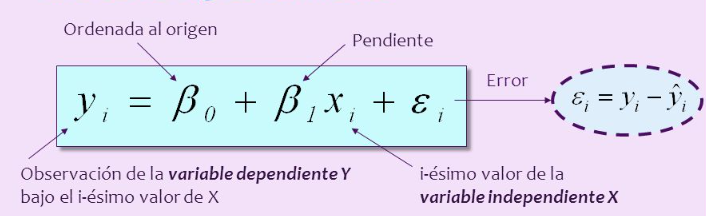

In [9]:
# Importación de bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt




data_of = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

data_de = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')


In [10]:
data_de.head()

,Date,demanda_diaria
0,2021-01-01,9.375536e+07
1,2021-01-02,9.804844e+07
2,2021-01-03,9.778708e+07
3,2021-01-04,1.039159e+08
4,2021-01-05,1.044716e+08


In [11]:
data_of.head()

,Date,oferta_diaria
0,2021-01-01,179502000.0
1,2021-01-02,179502000.0
2,2021-01-03,179502000.0
3,2021-01-04,179502000.0
4,2021-01-05,158622000.0


In [12]:
# División de los datos en conjunto de entrenamiento y prueba
X = data_de['demanda_diaria']
y = data_of['oferta_diaria']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)


In [16]:
# Asegurarse de que X_train, y_train y X_test sean matrices de 2 dimensiones
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción y evaluación
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)


Error cuadrático medio (MSE): 772503216085336.2
Coeficiente de determinación (R²): 0.06951024444070786


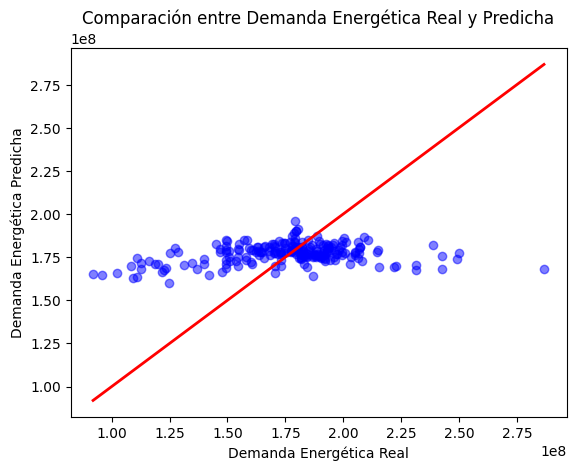

In [17]:
%matplotlib inline

# Visualización de los resultados
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel("Demanda Energética Real")
plt.ylabel("Demanda Energética Predicha")
plt.title("Comparación entre Demanda Energética Real y Predicha")
plt.show()

In [20]:
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR



# Datos de ejemplo (combina oferta y demanda)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')


# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Características y variable objetivo
X = data[['oferta_diaria']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(kernel='rbf')
}

# Evaluación de modelos
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados[nombre] = {'MAE': mae, 'MSE': mse, 'R2': r2}

# Mostrar resultados
resultados_df = pd.DataFrame(resultados).T
print(resultados_df)

                            MAE           MSE        R2
Regresión Lineal   5.960339e+06  5.631244e+13  0.090689
Árbol de Decisión  6.600046e+06  7.229472e+13 -0.167387
Random Forest      5.704167e+06  5.331351e+13  0.139114
Gradient Boosting  5.297457e+06  4.579475e+13  0.260524
SVR                6.071814e+06  6.195187e+13 -0.000375


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Datos de ejemplo (demanda y oferta)
demanda = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/demanda_diaria_regresion.txt', sep='\t')
oferta = pd.read_csv('C:/Users/jonal/OneDrive/Documentos/12_Bootcamp_Talento_Tech/Proyecto/Streamlit/Data/oferta_diaria_regresion.txt', sep='\t')

# Combinar los datos
data = pd.merge(demanda, oferta, on='Date')

# Crear nuevas características
data['diferencia_demanda'] = data['demanda_diaria'].diff().fillna(0)
data['media_movil_demanda'] = data['demanda_diaria'].rolling(window=3).mean().fillna(data['demanda_diaria'].mean())
data['lag_demanda'] = data['demanda_diaria'].shift(1).fillna(data['demanda_diaria'].mean())

# Características y variable objetivo
X = data[['oferta_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']]
y = data['demanda_diaria']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con escalado y modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de características
    ('model', GradientBoostingRegressor())  # Modelo de Gradient Boosting
])

# Definir los hiperparámetros a buscar en GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Evaluación del modelo optimizado
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

Mejores Hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
MAE: 728967.718857183
MSE: 1116382663007.502
R2: 0.9819730888126732


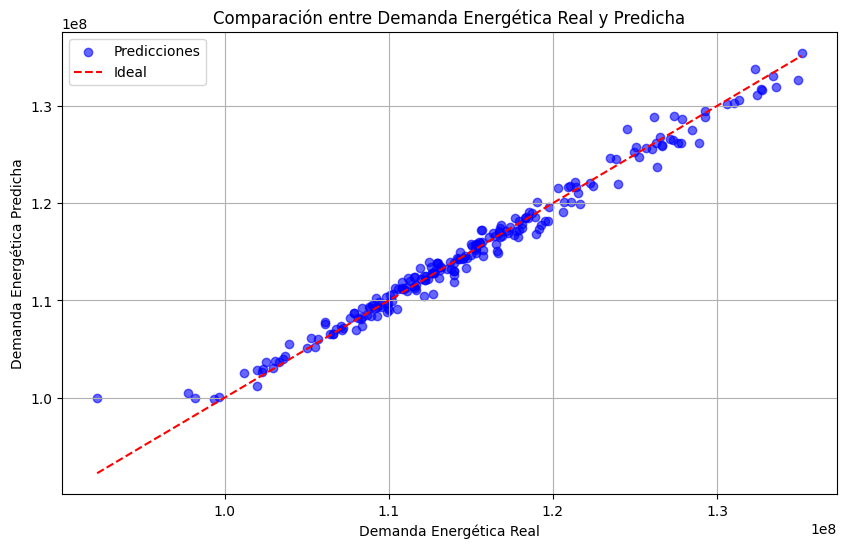

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Scatter plot de valores reales vs. predichos
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')

# Configuración del gráfico
plt.xlabel('Demanda Energética Real')
plt.ylabel('Demanda Energética Predicha')
plt.title('Comparación entre Demanda Energética Real y Predicha')
plt.legend()
plt.grid(True)
plt.show()

13:27:21 - cmdstanpy - INFO - Chain [1] start processing
13:27:22 - cmdstanpy - INFO - Chain [1] done processing


Predicción para 2025-12-30:
Demanda Estimada: 154477980.68
Intervalo de Confianza: [135832194.73, 172347395.51]


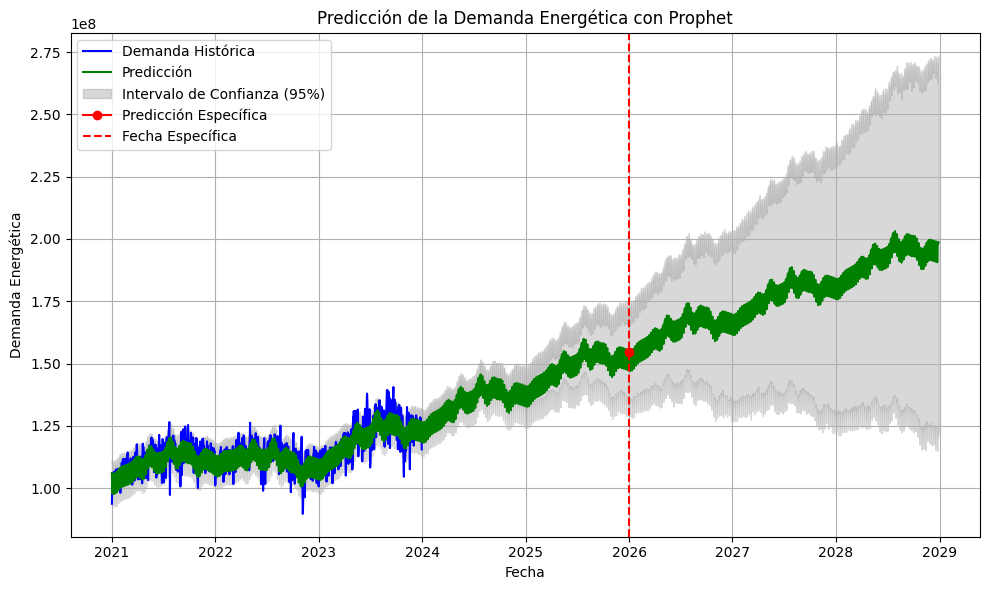

In [23]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fechas esté en el formato correcto
data['Date'] = pd.to_datetime(data['Date'])

# Preparar los datos para Prophet
data_prophet = data[['Date', 'demanda_diaria']].copy()
data_prophet.columns = ['ds', 'y']

# Crear y ajustar el modelo de Prophet
model_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model_prophet.fit(data_prophet)

# Función para predecir la demanda en una fecha específica
def predecir_demanda(fecha_futura, anos_prediccion=5):
    """
    Genera la predicción de la demanda para una fecha futura específica.
    
    :param fecha_futura: Fecha a predecir (formato 'YYYY-MM-DD').
    :param anos_prediccion: Número de años para generar predicciones (default=5).
    """
    # Crear un DataFrame con las fechas a futuro (hasta el número de años especificado)
    dias_prediccion = 365 * anos_prediccion
    future = model_prophet.make_future_dataframe(periods=dias_prediccion)
    forecast = model_prophet.predict(future)
    
    # Buscar la predicción para la fecha dada
    prediccion = forecast[forecast['ds'] == fecha_futura]
    
    if not prediccion.empty:
        yhat = prediccion['yhat'].values[0]
        yhat_lower = prediccion['yhat_lower'].values[0]
        yhat_upper = prediccion['yhat_upper'].values[0]
        
        print(f"Predicción para {fecha_futura.date()}:")
        print(f"Demanda Estimada: {yhat:.2f}")
        print(f"Intervalo de Confianza: [{yhat_lower:.2f}, {yhat_upper:.2f}]")
        
        # Visualizar la predicción en el gráfico completo
        fig, ax = plt.subplots(figsize=(10, 6))

        # Graficar la demanda histórica
        ax.plot(data_prophet['ds'], data_prophet['y'], label='Demanda Histórica', color='blue')

        # Graficar la predicción
        ax.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='green')

        # Graficar el intervalo de confianza
        ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                        color='gray', alpha=0.3, label='Intervalo de Confianza (95%)')

        # Destacar la predicción en la fecha especificada
        ax.plot(fecha_futura, yhat, marker='o', color='red', label='Predicción Específica')
        ax.axvline(pd.to_datetime(fecha_futura), color='red', linestyle='--', label='Fecha Específica')

        # Personalización del gráfico
        ax.set_title('Predicción de la Demanda Energética con Prophet')
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Demanda Energética')
        ax.legend(loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    else:
        print(f"No se encontró una predicción para la fecha {fecha_futura}. Verifica si la fecha está dentro del rango de predicción.")

# Ejemplo de uso
fecha_futura = '2025-12-30'  # Reemplaza con la fecha deseada
predecir_demanda(pd.to_datetime(fecha_futura), anos_prediccion=5)



C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jonal\AppData\Roaming\Python\Python312\site-packa

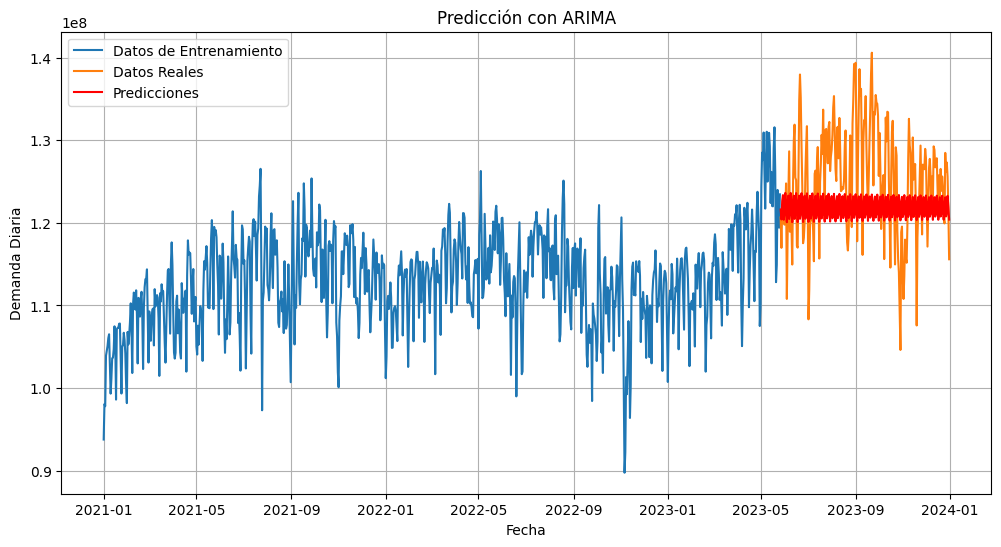

MAE: 5917458.8881072365
MSE: 52573686380176.76
R2: -0.21796983778581436


In [49]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Preparar los datos
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Seleccionar solo la demanda diaria para la serie temporal
demanda_series = data['demanda_diaria']

# Dividir en entrenamiento y prueba (80% entrenamiento, 20% prueba)
split_index = int(len(demanda_series) * 0.8)
train, test = demanda_series[:split_index], demanda_series[split_index:]

# Ajustar el modelo ARIMA
# Los parámetros p, d, q se deben ajustar según los datos:
# p: número de términos autorregresivos
# d: número de diferencias para hacer la serie estacionaria
# q: número de términos de media móvil
model = ARIMA(train, order=(5, 1, 2))  # Ajuste inicial de p, d, q
model_fit = model.fit()

# Predicción
predictions = model_fit.forecast(steps=len(test))

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(train, label='Datos de Entrenamiento')
plt.plot(test, label='Datos Reales')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.xlabel('Fecha')
plt.ylabel('Demanda Diaria')
plt.title('Predicción con ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Evaluación del modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
r2 = r2_score(test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")


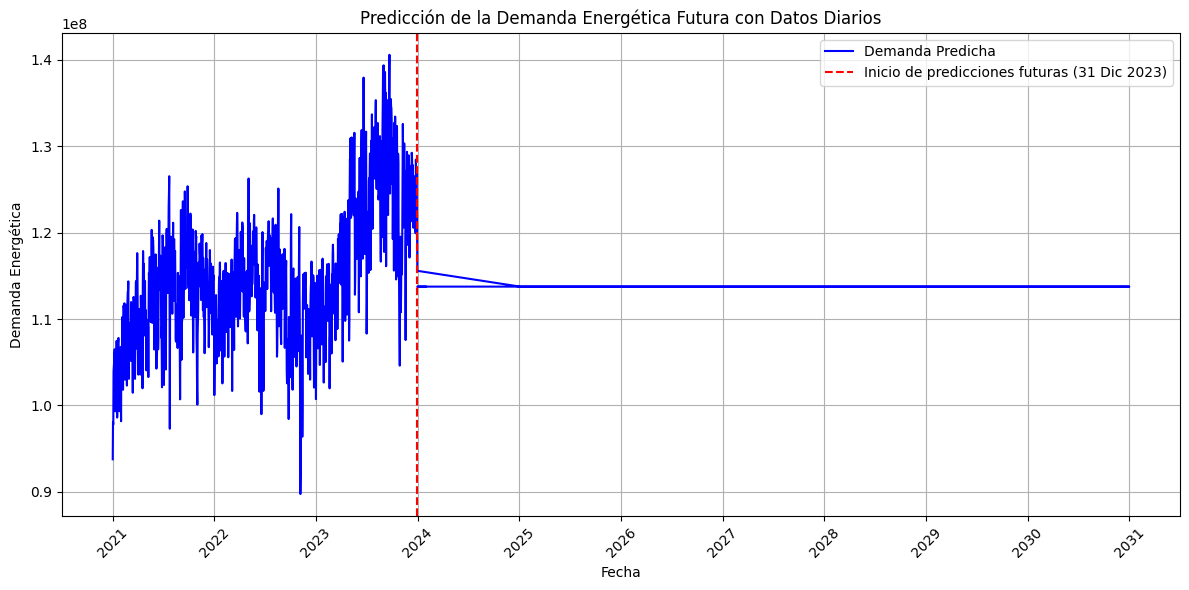

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

# Asegurar que la columna 'Date' sea datetime
data['Date'] = pd.to_datetime(data['Date'])

# Permitir definir una fecha arbitraria para finalizar las predicciones
ultima_fecha = pd.to_datetime(input("Ingresa la última fecha en formato AAAA-MM-DD (o deja en blanco para usar la última fecha disponible): ") or data['Date'].max())

# Definir la fecha de inicio de las predicciones (31 Dic 2023)
fecha_inicio_predicciones = pd.to_datetime('2023-12-31')

# Generar fechas entre 1 Ene 2025 y la última fecha especificada
fechas_hasta_ultima = pd.date_range(start='2025-01-01', end=ultima_fecha, freq='D')

# Crear un DataFrame para estas fechas con características similares
hasta_ultima_df = pd.DataFrame({'Date': fechas_hasta_ultima})
hasta_ultima_df['oferta_diaria'] = data['oferta_diaria'].iloc[-1]
hasta_ultima_df['diferencia_demanda'] = data['diferencia_demanda'].iloc[-1]
hasta_ultima_df['media_movil_demanda'] = data['media_movil_demanda'].iloc[-1]
hasta_ultima_df['lag_demanda'] = data['demanda_diaria'].iloc[-1]

# Hacer predicciones para las fechas hasta la última
hasta_ultima_df['demanda_predicha'] = best_model.predict(hasta_ultima_df[['oferta_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']])

# Generar fechas futuras después de 31 Dic 2023
fechas_futuras = pd.date_range(start=fecha_inicio_predicciones + timedelta(days=1), periods=30, freq='D')

# Crear un DataFrame para las fechas futuras con características similares
futuro_df = pd.DataFrame({'Date': fechas_futuras})
futuro_df['oferta_diaria'] = data['oferta_diaria'].iloc[-1]
futuro_df['diferencia_demanda'] = data['diferencia_demanda'].iloc[-1]
futuro_df['media_movil_demanda'] = data['media_movil_demanda'].iloc[-1]
futuro_df['lag_demanda'] = data['demanda_diaria'].iloc[-1]

# Hacer predicciones para las fechas futuras
futuro_df['demanda_predicha'] = best_model.predict(futuro_df[['oferta_diaria', 'diferencia_demanda', 'media_movil_demanda', 'lag_demanda']])

# Concatenar los datos históricos, hasta la última fecha, y futuros
historico_df = data[data['Date'] <= ultima_fecha][['Date', 'demanda_diaria']].rename(columns={'demanda_diaria': 'demanda_predicha'})
visual_df = pd.concat([historico_df, hasta_ultima_df, futuro_df[['Date', 'demanda_predicha']]], ignore_index=True)

# Graficar las predicciones de demanda en el tiempo
plt.figure(figsize=(12, 6))
plt.plot(visual_df['Date'], visual_df['demanda_predicha'], label='Demanda Predicha', color='blue')
plt.axvline(x=fecha_inicio_predicciones, linestyle='--', color='red', label='Inicio de predicciones futuras (31 Dic 2023)')
plt.xlabel('Fecha')
plt.ylabel('Demanda Energética')
plt.title('Predicción de la Demanda Energética Futura con Datos Diarios')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [10]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm


#Muestras----------------------------
def create_sample1(n, ruido):
    X = np.array(range(n)).reshape((-1, 1))
    # Crear una relación lineal con pendiente y un término constante
    beta_0 = 20  # Intersección
    beta_1 = 1   # Pendiente
    ruido_error = np.random.normal(0, ruido, size=n)
    y = beta_0 + beta_1 * X.flatten() + ruido_error
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

def create_sample2(n, ruido):
    y = []
    X = list(range(n))
    for i in range(len(X)):
        y.append((X[i]-5)**2+random.random()*ruido*abs(len(X)/2-i))
    X = np.array(X).reshape((-1, 1))
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

#Evaluar modelo--------------------------
def evaluateModel(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)#Raíz del Error Cuadrático Medio (RMSE)
    mae = mean_absolute_error(y_true, y_pred)#Error Absoluto Medio (MAE)
    r2 = r2_score(y_true, y_pred)#Coeficiente de Determinación (R²)
    return rmse, mae, r2

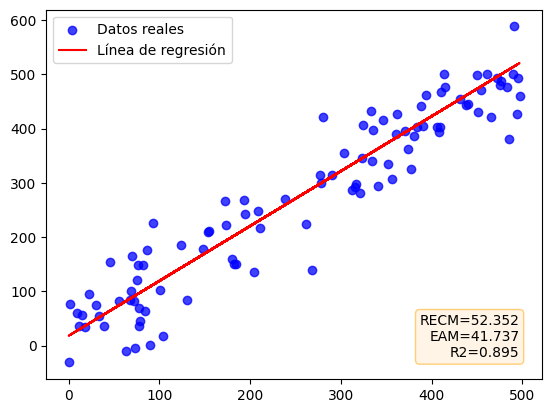

In [11]:
# Parte 1: Regresión Lineal Simple
x_train, y_train, x_test, y_test = create_sample1(500,50)

# Crear el modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_test)

#Evaluar modelo
recm, eam, r2 = evaluateModel(y_test,y_pred)

# Visualizar
plt.scatter(x_test, y_test, color='blue', alpha=0.75, label='Datos reales')  # Datos originales
plt.plot(x_test, y_pred, 'r', label='Línea de regresión')  # Línea de regresión
stats = (f'RECM={recm:.3f}\n'
         f'EAM={eam:.3f}\n'
         f'R2={r2:.3f}')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
plt.text(max(x_test), min(y_test)+10, stats, bbox=bbox,horizontalalignment='right')
plt.legend()
plt.show()

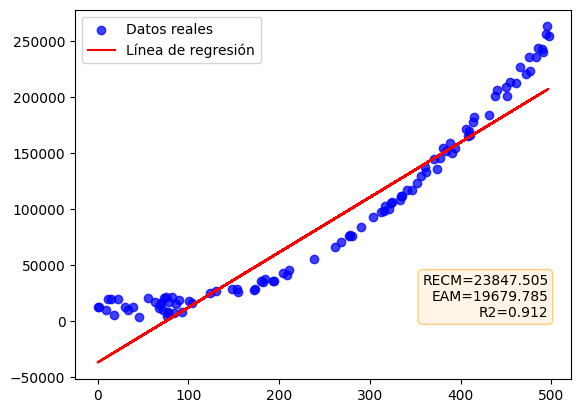

In [7]:
# Parte 2: Datos no lineales
x_train, y_train, x_test, y_test = create_sample2(500,100)

# Crear el modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Predecir
y_pred = model.predict(x_test)

#Evaluar modelo
recm, eam, r2 = evaluateModel(y_test,y_pred)

# Visualizar
plt.scatter(x_test, y_test, color='blue', alpha=0.75, label='Datos reales')  # Datos originales
plt.plot(x_test, y_pred, 'r', label='Línea de regresión')  # Línea de regresión
stats = (f'RECM={recm:.3f}\n'
         f'EAM={eam:.3f}\n'
         f'R2={r2:.3f}')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
plt.text(max(x_test), min(y_test)+10, stats, bbox=bbox,horizontalalignment='right')
plt.legend()
plt.show()

# Supuestos Regresión Lineal
Supuestos estadisticos:
1. Relación lineal: La relación entre 𝑋 y 𝑌 debe ser lineal.
2. Independencia de los errores: No debe haber autocorrelación entre los
errores.
3. Homoscedasticidad: La varianza de los errores debe ser constante.
4. Normalidad de los errores: Los errores deben estar distribuidos normalmente.


In [13]:
# Paso 1: Generar datos de ejemplo
x_train, y_train, x_test, y_test = create_sample2(500,50)

# Paso 2: Crear el modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Paso 3: Predicciones y residuos
y_pred = model.predict(x_test)
residuals = y_test - y_pred

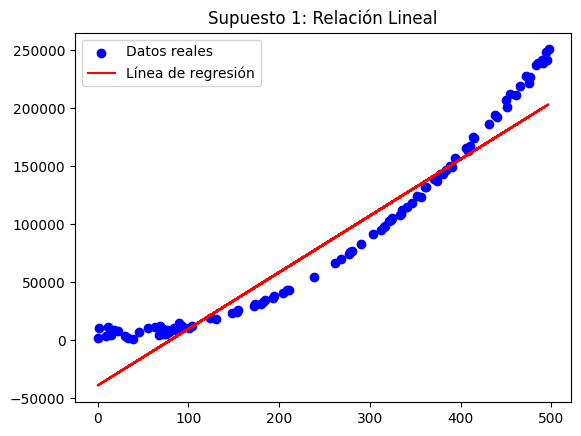

In [14]:
# Supuesto 1: Relación lineal
# Generar un gráfico de dispersión entre las variables 𝑋 e 𝑌
# para verificar visualmente si existe una relación lineal.
# Graficar dispersión entre X e y, y la línea de regresión
plt.scatter(x_test, y_test, color='blue', label='Datos reales')
plt.plot(x_test, y_pred, color='red', label='Línea de regresión')
plt.title('Supuesto 1: Relación Lineal')
plt.legend()
plt.show()

In [16]:
# Supuesto 2: Independencia de los errores
# Si DW ≈ 2: Indica que no hay autocorrelación entre los residuos.
# ste es el valor ideal y sugiere que los errores son independientes.
# Calcular el estadístico de Durbin-Watson
print(f"-------- Test de Durbin-Watson--------")
dw_stat = durbin_watson(residuals)
if dw_stat < 1.5:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 0 a 1.5: Posible autocorrelación positiva.")
elif dw_stat > 2.5:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 2.5 a 4: Posible autocorrelación negativa.")
else:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 1.5 a 2.5: No hay evidencia de autocorrelación (los errores son independientes).")


-------- Test de Durbin-Watson--------
Estadístico de Durbin-Watson: 1.88.
 Un valor de 1.5 a 2.5: No hay evidencia de autocorrelación (los errores son independientes).


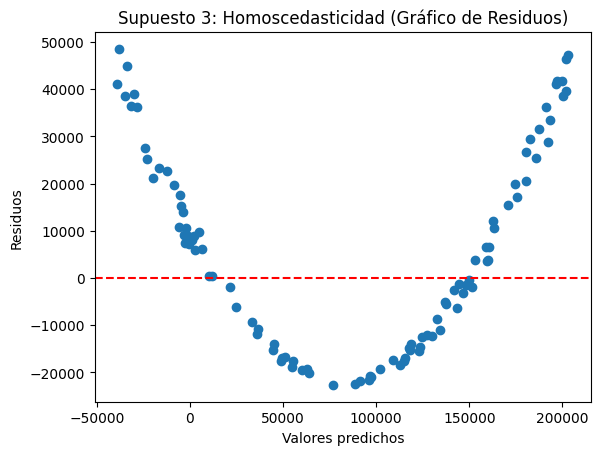

In [17]:
# Supuesto 3: Homoscedasticidad
# Graficar los residuos para verificar si tienen varianza constante
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Supuesto 3: Homoscedasticidad (Gráfico de Residuos)')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

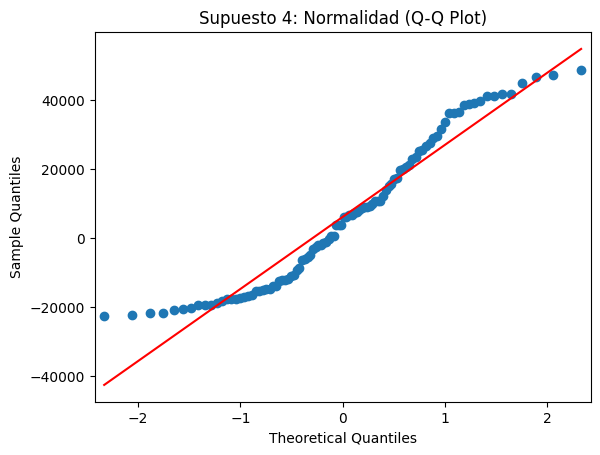

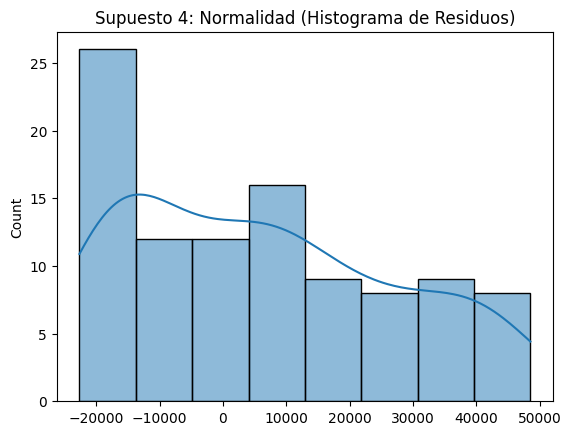

-------- Prueba de Shapiro-Wilk--------
Estadistico=0.9313928373623634,
 los datos podrían ser normales, pero revisa el p-valor.
p-valor=5.975304240779956e-05, se concluye que los datos no son normales.


In [18]:
#Supuesto 4: Normalidad de los errores
# Gráfico Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Supuesto 4: Normalidad (Q-Q Plot)')
plt.show()

# Histograma de los residuos
sns.histplot(residuals, kde=True)
plt.title('Supuesto 4: Normalidad (Histograma de Residuos)')
plt.show()

# Prueba de Shapiro-Wilk para normalidad
# p-valor: Este es el valor que más se utiliza para interpretar la prueba.
# El p-valor nos dice si podemos rechazar o no la hipótesis nula
# de la prueba((H₀): Los datos siguen una distribución normal.)
print(f"-------- Prueba de Shapiro-Wilk--------")
shapiro_stat, p_value = shapiro(residuals)
if shapiro_stat > 0.95:
    print(f"Estadístico={shapiro_stat},\n los datos probablemente son normales.")
elif shapiro_stat < 0.90:
    print(f"Estadistico={shapiro_stat},\n los datos probablemente no son normales, especialmente si el p-valor es bajo.")
else:
    print(f"Estadistico={shapiro_stat},\n los datos podrían ser normales, pero revisa el p-valor.")

if p_value > 0.05:
    print(f"p-valor={p_value}, se asume que los datos siguen una distribución normal.")
else:
    print(f"p-valor={p_value}, se concluye que los datos no son normales.")

# Regresión Lineal Múltiple
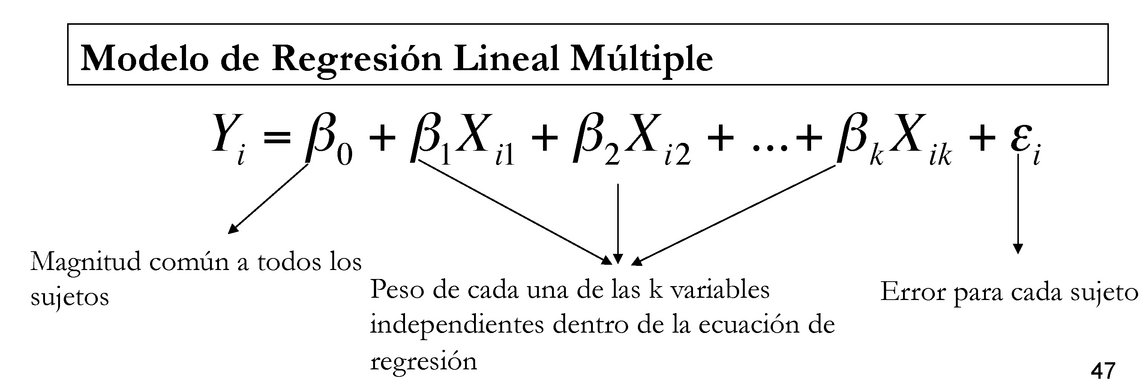

In [39]:
# Paso 1: Generar datos de ejemplo
def create_sample1(n, ruido):
    x1 = np.random.rand(n)*10
    x2 = np.random.rand(n)*1000
    x3 = np.random.rand(n)*100000
    y = 5 + 3 * x1 + 2 * x2 + 1.5 * x3 + np.random.randn(n) * ruido
    df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
    X  = df[['x1', 'x2', 'x3']]  # Variables independientes
    y = df['y']  # Variable dependiente
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

def create_sample2(n, ruido):
    x1 = np.random.rand(n)
    x2 = x1*5+ np.random.randn(n) * 0.1
    x3 = np.random.exponential(scale=1, size=n)
    y = np.random.exponential(scale=1, size=n)*ruido + 3 * (x1 ** 3) + np.cos(x2) + np.sin(x3)
    df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})
    X  = df[['x1', 'x2', 'x3']]  # Variables independientes
    y = df['y']  # Variable dependiente
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

def create_sample3():
    diabetes = datasets.load_diabetes()
    diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    X = diabetes_df  # Variables independientes (características)
    X = diabetes_df.drop(['s1', 's2', 's4'], axis=1)#Eliminar las correlacionadas del análisis
    y = diabetes.target  # Variable dependiente (objetivo a predecir)
    # 3. Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test


In [41]:
# Crear datos
x_train, y_train, x_test, y_test = create_sample3()

# Paso 2: Crear el modelo y ajustarlo
model = LinearRegression()
model.fit(x_train, y_train)


# Paso 3: Predicciones y residuos
y_pred = model.predict(x_test)
residuals = y_test - y_pred

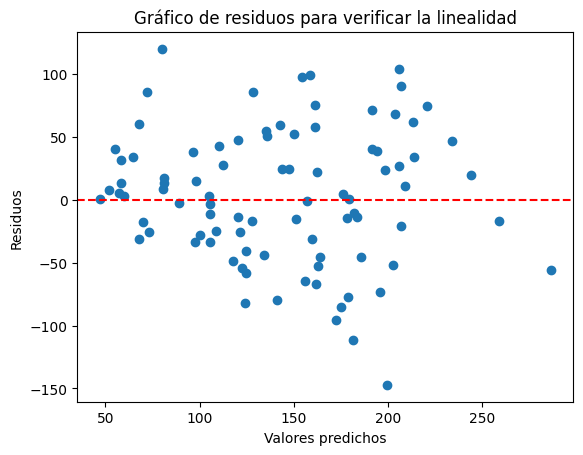

In [42]:
# Supuesto 1: Relación lineal
# Gráfico de residuos para verificar la relación lineal
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos para verificar la linealidad')
plt.show()

In [43]:
# Supuesto 2: Independencia de los errores
# Si DW ≈ 2: Indica que no hay autocorrelación entre los residuos.
# ste es el valor ideal y sugiere que los errores son independientes.
# Calcular el estadístico de Durbin-Watson
print(f"-------- Test de Durbin-Watson--------")
dw_stat = durbin_watson(residuals)
if dw_stat < 1.5:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 0 a 1.5: Posible autocorrelación positiva.")
elif dw_stat > 2.5:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 2.5 a 4: Posible autocorrelación negativa.")
else:
    print(f"Estadístico de Durbin-Watson: {dw_stat:.2f}.\n Un valor de 1.5 a 2.5: No hay evidencia de autocorrelación (los errores son independientes).")


-------- Test de Durbin-Watson--------
Estadístico de Durbin-Watson: 2.16.
 Un valor de 1.5 a 2.5: No hay evidencia de autocorrelación (los errores son independientes).


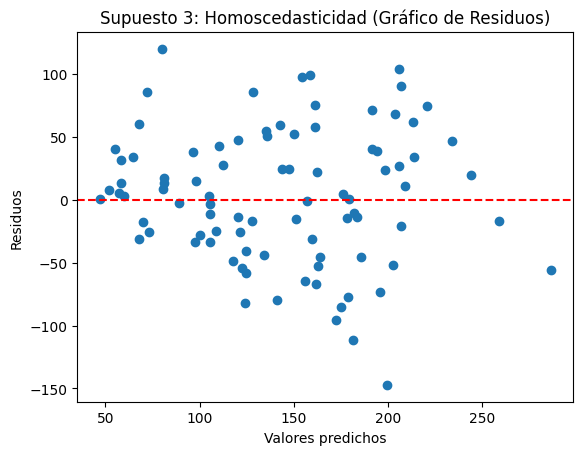

In [44]:
# Supuesto 3: Homoscedasticidad
# Graficar los residuos para verificar si tienen varianza constante
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Supuesto 3: Homoscedasticidad (Gráfico de Residuos)')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

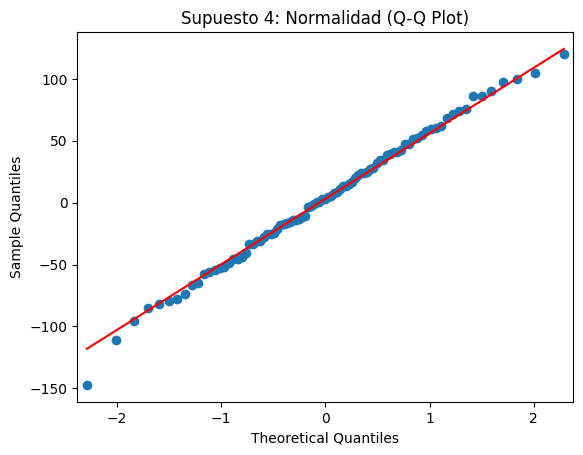

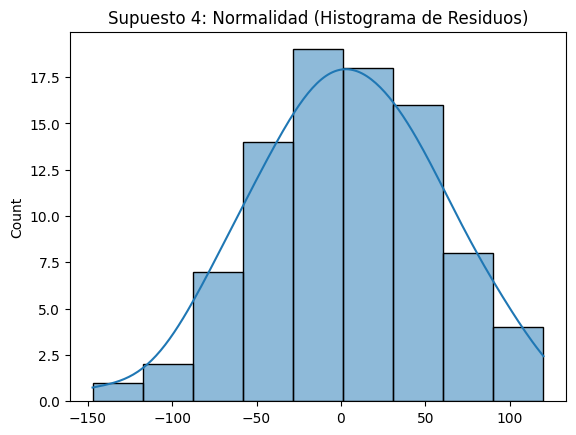

-------- Prueba de Shapiro-Wilk--------
Estadístico=0.9951685872702739,
 los datos probablemente son normales.
p-valor=0.9874282151298076, se asume que los datos siguen una distribución normal.


In [45]:
# Supuesto 4: Normalidad de los errores
# Gráfico Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Supuesto 4: Normalidad (Q-Q Plot)')
plt.show()

# Histograma de los residuos
sns.histplot(residuals, kde=True)
plt.title('Supuesto 4: Normalidad (Histograma de Residuos)')
plt.show()

# Prueba de Shapiro-Wilk para normalidad
# p-valor: Este es el valor que más se utiliza para interpretar la prueba.
# El p-valor nos dice si podemos rechazar o no la hipótesis nula
# de la prueba((H₀): Los datos siguen una distribución normal.)
print(f"-------- Prueba de Shapiro-Wilk--------")
shapiro_stat, p_value = shapiro(residuals)
if shapiro_stat > 0.95:
    print(f"Estadístico={shapiro_stat},\n los datos probablemente son normales.")
elif shapiro_stat < 0.90:
    print(f"Estadistico={shapiro_stat},\n los datos probablemente no son normales, especialmente si el p-valor es bajo.")
else:
    print(f"Estadistico={shapiro_stat},\n los datos podrían ser normales, pero revisa el p-valor.")

if p_value > 0.05:
    print(f"p-valor={p_value}, se asume que los datos siguen una distribución normal.")
else:
    print(f"p-valor={p_value}, se concluye que los datos no son normales.")


In [46]:
# Supuesto 5: No multicolinealidad
# No aplicable para la regresión lineal simple, pero si fuera múltiple, se calcularía el VIF
# Agregar una columna de unos para el intercepto
X_with_const = sm.add_constant(x_test)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(f"-------- Factor de Inflación de la Varianza--------")
# Análisis VIF
vif_column = vif_data['VIF']  # Acceder a la columna VIF
for valor in vif_column:
    if valor == 1:
        print(f"VIF = {valor:.2f},\n no hay correlación entre la variable independiente y las demás.")
    elif valor > 10:
        print(f"VIF = {valor:.2f},\n existe multicolinealidad severa, y es recomendable tomar medidas.")
    elif valor > 5:
        print(f"VIF = {valor:.2f},\n la correlación es fuerte y debe revisarse.")
    else:
        print(f"VIF = {valor:.2f},\n la correlación es moderada y generalmente aceptable.")


-------- Factor de Inflación de la Varianza--------
VIF = 1.05,
 la correlación es moderada y generalmente aceptable.
VIF = 1.28,
 la correlación es moderada y generalmente aceptable.
VIF = 1.63,
 la correlación es moderada y generalmente aceptable.
VIF = 1.33,
 la correlación es moderada y generalmente aceptable.
VIF = 1.89,
 la correlación es moderada y generalmente aceptable.
VIF = 1.69,
 la correlación es moderada y generalmente aceptable.
VIF = 1.61,
 la correlación es moderada y generalmente aceptable.
VIF = 1.51,
 la correlación es moderada y generalmente aceptable.


In [47]:
#Evaluar
def evaluateModel(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)#Raíz del Error Cuadrático Medio (RMSE)
    mae = mean_absolute_error(y_true, y_pred)#Error Absoluto Medio (MAE)
    r2 = r2_score(y_true, y_pred)#Coeficiente de Determinación (R²)
    return rmse, mae, r2

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
RECM, EAM, r2 = evaluateModel(y_test,y_pred)
print(f"RMSE: {RECM:.2f}, MAE: {EAM:.2f}, R²: {r2:.2f}")

RMSE: 53.06, MAE: 42.84, R²: 0.47


# Último


(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Valor mínimo: 25.0
Valor máximo: 346.0


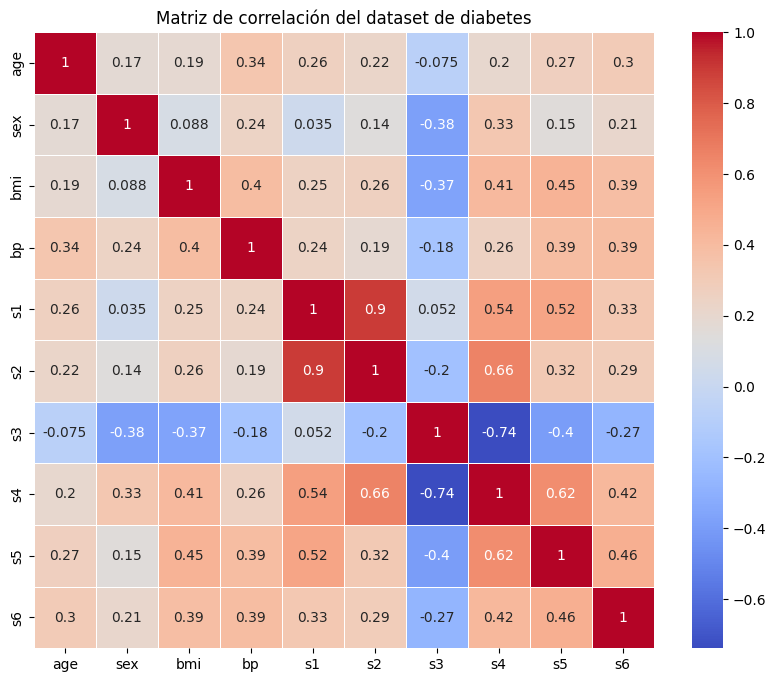

RMSE: 53.85, MAE: 42.79, R²: 0.45


In [58]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#https://scikit-learn.org/1.5/datasets/toy_dataset.html#diabetes-dataset
diabetes = datasets.load_diabetes()
print(diabetes.data.shape)

# Ver las etiquetas de las columnas (nombres de las características)
print(diabetes.feature_names)

# Obtener el valor mínimo y máximo de la variable objetivo
print(f"Valor mínimo: {np.min(diabetes.target)}")
print(f"Valor máximo: {np.max(diabetes.target)}")

# 1. Crear un DataFrame con los datos y las etiquetas de las columnas
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# 2. Preparar datos
X = diabetes_df  # Variables independientes (características)
#X = diabetes_df.drop(['age', 'sex', 's1', 's2', 's3', 's4', 's5', 's6'], axis=1)#Eliminar las correlacionadas del análisis
y = diabetes.target  # Variable dependiente (objetivo a predecir)

# Calcular la matriz de correlación
correlation_matrix = X.corr()

# Graficar el heatmap (mapa de calor) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación del dataset de diabetes')
plt.show()

# 3. Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Crear el modelo de regresión lineal
model = LinearRegression()

# 5. Ajustar (entrenar) el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# 6. Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# 7. Evaluar el modelo
def evaluateModel(y_true, y_pred):
    rmse = root_mean_squared_error(y_true, y_pred)#Raíz del Error Cuadrático Medio (RMSE)
    mae = mean_absolute_error(y_true, y_pred)#Error Absoluto Medio (MAE)
    r2 = r2_score(y_true, y_pred)#Coeficiente de Determinación (R²)
    return rmse, mae, r2

RECM, EAM, r2 = evaluateModel(y_test,y_pred)
print(f"RMSE: {RECM:.2f}, MAE: {EAM:.2f}, R²: {r2:.2f}")

In [59]:
print(y_pred)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412